In [100]:
# carrega modelo do classificador
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import numpy as np

In [101]:
import numpy as np
X = np.load('Banco de dados/Num.npy')
y = np.load('Banco de dados/Target.npy')

# inversao para branco (255) no fundo preto (0) e normalização
X = X/255
X = -X + 1

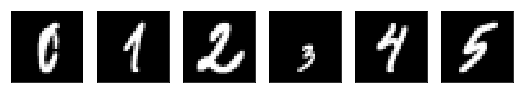

In [102]:
# plota algumas imagens
fig = plt.figure(figsize = [9,3])
for i in np.arange(6):
        plt.subplot(1, 6, i+1, xticks = [], yticks = [])
        plt.imshow(np.reshape(X[i+520], (28,28)), cmap='gray')#plt.cm.gray_r)

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123)

In [104]:
np.shape(X_train)

(1920, 784)

In [111]:
# cria classificador usando uma rede neural
clf = MLPClassifier(hidden_layer_sizes=(100),activation='relu', max_iter=55, alpha=1e-4,
                    solver='lbfgs', verbose=False, tol=1e-4, random_state=6,
                    learning_rate_init=.1)
clf.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=100, learning_rate='constant',
       learning_rate_init=0.1, max_iter=55, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=6, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [112]:
# score
clf.score(X_test, y_test, sample_weight=None)

0.99791666666666667

In [114]:
%run -i 'separa_algarismos.ipynb'

In [115]:
for i in np.arange(len(Vetores)):
    Vetores[i] = (-Vetores[i] + 255)/255

In [116]:
clf.predict(Vetores[0:6])

array([2, 2, 3, 1, 4, 1])

In [110]:
#gabarito do teste 1: 2, 5, 5
#gabarito do teste 2: 0, 2, 3, 7, 4, 1